In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/train.tsv', sep='\t')
test_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/test.tsv', sep='\t')
reviews_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/reviews.tsv', sep='\t')

print('train', train_df.shape)
print('test', test_df.shape)
print('reviews', reviews_df.shape)

train (41105, 286)
test (9276, 285)
reviews (440082, 2)


## EDA

In [ ]:
print('\n' + '='*80)
print('ПЕРЕСЕЧЕНИЕ ID МЕЖДУ TRAIN И TEST')
print('='*80)
train_ids = set(train_df['id'].values)
test_ids = set(test_df['id'].values)
intersection = train_ids & test_ids
print(f'Уникальных ID в train: {len(train_ids)}')
print(f'Уникальных ID в test: {len(test_ids)}')
print(f'Пересечений: {len(intersection)}')
print(f'Пересечение есть: {"ДА ⚠️" if len(intersection) > 0 else "НЕТ ✓"}')

print('\n' + '='*80)
print('ПОКРЫТИЕ ОТЗЫВАМИ')
print('='*80)
reviews_per_place = reviews_df.groupby('id').size()
train_with_reviews = train_df['id'].isin(reviews_per_place.index).sum()
test_with_reviews = test_df['id'].isin(reviews_per_place.index).sum()

print(f'Заведений в train с отзывами: {train_with_reviews} ({train_with_reviews/len(train_df)*100:.1f}%)')
print(f'Заведений в test с отзывами: {test_with_reviews} ({test_with_reviews/len(test_df)*100:.1f}%)')
print(f'\nСтатистика отзывов на заведение:')
print(reviews_per_place.describe())

print('\n' + '='*80)
print('РАСПРЕДЕЛЕНИЕ TARGET')
print('='*80)
print(train_df['target'].describe())
print(f'\nTarget == 0 (нет рейтинга): {(train_df["target"] == 0).sum()} ({(train_df["target"] == 0).sum()/len(train_df)*100:.1f}%)')
print(f'Target > 0: {(train_df["target"] > 0).sum()} ({(train_df["target"] > 0).sum()/len(train_df)*100:.1f}%)')

print('\n' + '='*80)
print('КАТЕГОРИИ ЗАВЕДЕНИЙ')
print('='*80)
print(f'Уникальных категорий в train: {train_df["category"].nunique()}')
print(f'Уникальных категорий в test: {test_df["category"].nunique()}')
print(f'\nТоп-10 категорий в train:')
print(train_df['category'].value_counts().head(10))

print('\n' + '='*80)
print('ТОП-20 КОРРЕЛЯЦИЙ С TARGET (числовые признаки)')
print('='*80)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('id')
if 'target' in numeric_cols:
    numeric_cols.remove('target')

correlations = train_df[train_df['target'] > 0][numeric_cols + ['target']].corr()['target'].abs().sort_values(ascending=False)
print(correlations.head(20))

print('\n' + '='*80)
print('ПРОПУСКИ В ДАННЫХ')
print('='*80)
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
if len(missing_train) > 0:
    print('Train:')
    print(missing_train.head(10))
else:
    print('Train: нет пропусков ✓')

missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
if len(missing_test) > 0:
    print('\nTest:')
    print(missing_test.head(10))
else:
    print('Test: нет пропусков ✓')

print('\n' + '='*80)
print('GEOGRAPHIC COVERAGE')
print('='*80)

train_coords = train_df['coordinates'].str.strip('[]').str.split(',', expand=True)
train_lon = train_coords[0].astype(float)
train_lat = train_coords[1].astype(float)

print('Train coordinates range:')
print(f"Longitude: [{train_lon.min():.4f}, {train_lon.max():.4f}]")
print(f"Latitude: [{train_lat.min():.4f}, {train_lat.max():.4f}]")

test_coords = test_df['coordinates'].str.strip('[]').str.split(',', expand=True)
test_lon = test_coords[0].astype(float)
test_lat = test_coords[1].astype(float)

print('Test coordinates range:')
print(f"Longitude: [{test_lon.min():.4f}, {test_lon.max():.4f}]")
print(f"Latitude: [{test_lat.min():.4f}, {test_lat.max():.4f}]")


ПЕРЕСЕЧЕНИЕ ID МЕЖДУ TRAIN И TEST
Уникальных ID в train: 41105
Уникальных ID в test: 9276
Пересечений: 0
Пересечение есть: НЕТ ✓

ПОКРЫТИЕ ОТЗЫВАМИ
Заведений в train с отзывами: 31205 (75.9%)
Заведений в test с отзывами: 7565 (81.6%)

Статистика отзывов на заведение:
count    38770.000000
mean        11.351096
std          4.437944
min          2.000000
25%         10.000000
50%         10.000000
75%         10.000000
max         22.000000
dtype: float64

РАСПРЕДЕЛЕНИЕ TARGET
count    41105.000000
mean         3.399650
std          1.190479
min          0.000000
25%          3.400000
50%          3.700000
75%          4.000000
max          5.000000
Name: target, dtype: float64

Target == 0 (нет рейтинга): 3938 (9.6%)
Target > 0: 37167 (90.4%)

КАТЕГОРИИ ЗАВЕДЕНИЙ
Уникальных категорий в train: 40
Уникальных категорий в test: 40

Топ-10 категорий в train:
category
fastfood           2184
hair_salon         1891
travel_agency      1757
cosmetology        1713
car_service        1689
flow

ДЕТАЛЬНЫЙ ГЕОГРАФИЧЕСКИЙ АНАЛИЗ
Train: Lon [35.7526, 38.9691], Lat [55.0926, 56.9789]
Test:  Lon [36.3623, 38.2783], Lat [55.1446, 56.8082]

📍 Москва (Кремль): (37.6173, 55.7558)
Это МОСКОВСКИЙ РЕГИОН (Москва + Подмосковье)
Диапазон ~250-300 км


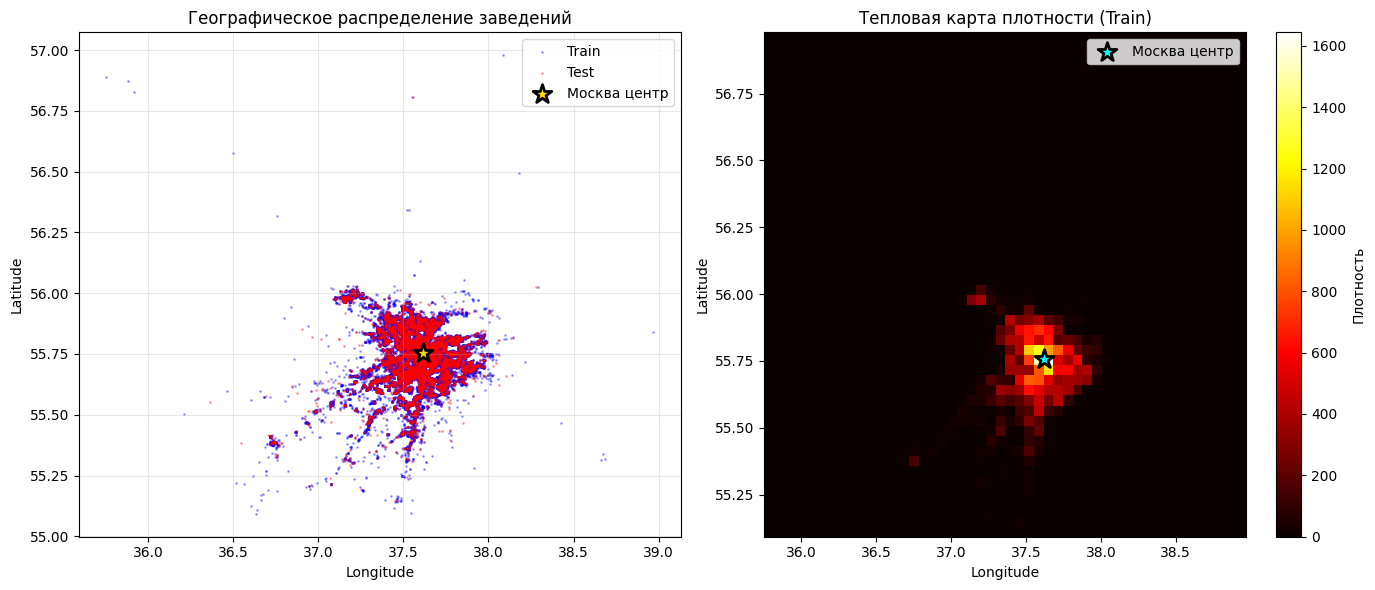

In [ ]:
print('='*80)
print('ДЕТАЛЬНЫЙ ГЕОГРАФИЧЕСКИЙ АНАЛИЗ')
print('='*80)

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans

train_lon = train_df['longitude'].values
train_lat = train_df['latitude'].values
test_lon = test_df['longitude'].values
test_lat = test_df['latitude'].values

print(f'Train: Lon [{train_lon.min():.4f}, {train_lon.max():.4f}], Lat [{train_lat.min():.4f}, {train_lat.max():.4f}]')
print(f'Test:  Lon [{test_lon.min():.4f}, {test_lon.max():.4f}], Lat [{test_lat.min():.4f}, {test_lat.max():.4f}]')

moscow_center = (37.6173, 55.7558)
print(f'\n📍 Москва (Кремль): {moscow_center}')
print('Это МОСКОВСКИЙ РЕГИОН (Москва + Подмосковье)')
print('Диапазон ~250-300 км')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_lon, train_lat, alpha=0.3, s=1, c='blue', label='Train')
plt.scatter(test_lon, test_lat, alpha=0.3, s=1, c='red', label='Test')
plt.scatter(moscow_center[0], moscow_center[1], c='gold', s=200, marker='*',
            edgecolors='black', linewidths=2, label='Москва центр', zorder=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Географическое распределение заведений')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist2d(train_lon, train_lat, bins=50, cmap='hot')
plt.colorbar(label='Плотность')
plt.scatter(moscow_center[0], moscow_center[1], c='cyan', s=200, marker='*',
            edgecolors='black', linewidths=2, label='Москва центр', zorder=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Тепловая карта плотности (Train)')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/vseros-2c/geo_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## Feature engineering

In [ ]:
!pip install -q sentence-transformers natasha razdel

import re
from collections import Counter
from sentence_transformers import SentenceTransformer
import torch

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 154.2 MB/s eta 0:00:00


#### making embeddings

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
embedding_model = SentenceTransformer('sergeyzh/LaBSE-ru-turbo', device=device)
embedding_model.max_seq_length = 256

modules.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/196 [00:00<?, ?B/s]

In [ ]:
def get_embeddings_batch(texts, batch_size=32):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc='Embedding'):
        batch = texts[i:i+batch_size]
        batch = [str(t)[:1000] for t in batch]
        emb = embedding_model.encode(batch, show_progress_bar=False, convert_to_numpy=True)
        embeddings.append(emb)
    return np.vstack(embeddings)

embeddings = get_embeddings_batch(reviews_df['text'].tolist(), batch_size=256)

reviews_df['embedding'] = list(embeddings)

Embedding:   0%|          | 0/1720 [00:00<?, ?it/s]

#### extracting text features

In [ ]:
positive_words = set([
    'отлично', 'прекрасно', 'замечательно', 'великолепно', 'превосходно',
    'хорошо', 'рекомендую', 'советую', 'понравилось', 'супер', 'класс',
    'качественно', 'вкусно', 'уютно', 'чисто', 'профессионально', 'быстро',
    'вежливо', 'приятно', 'удобно', 'качество', 'молодцы', 'спасибо'
])

negative_words = set([
    'ужасно', 'отвратительно', 'плохо', 'неприятно', 'грязно', 'долго',
    'невкусно', 'дорого', 'обман', 'разочарован', 'разочарована', 'жалоба',
    'не рекомендую', 'ужас', 'кошмар', 'грубо', 'хамство', 'невежливо',
    'обманули', 'некачественно', 'отстой', 'фу', 'беда', 'караул'
])

In [ ]:
def extract_text_features(reviews_group):
    texts = reviews_group['text'].fillna('').tolist()

    if len(texts) == 0 or all(t.strip() == '' for t in texts):
        return pd.Series({
            'review_count': 0,
            'avg_review_length': 0,
            'max_review_length': 0,
            'min_review_length': 0,
            'std_review_length': 0,
            'total_chars': 0,
            'avg_words': 0,
            'exclamation_count': 0,
            'question_count': 0,
            'exclamation_ratio': 0,
            'question_ratio': 0,
            'caps_ratio': 0,
            'positive_word_count': 0,
            'negative_word_count': 0,
            'sentiment_score': 0,
            'unique_word_ratio': 0,
            'avg_sentence_length': 0,
            'digit_ratio': 0,
        })

    lengths = [len(t) for t in texts]
    word_counts = [len(t.split()) for t in texts]

    all_text = ' '.join(texts).lower()
    exclamations = sum(t.count('!') for t in texts)
    questions = sum(t.count('?') for t in texts)
    total_chars = sum(lengths)
    caps_chars = sum(1 for c in all_text if c.isupper())
    digits = sum(1 for c in all_text if c.isdigit())

    words = all_text.split()
    positive_count = sum(1 for w in words if w in positive_words)
    negative_count = sum(1 for w in words if w in negative_words)

    sentences = re.split(r'[.!?]+', all_text)
    sentences = [s.strip() for s in sentences if s.strip()]
    avg_sent_len = np.mean([len(s.split()) for s in sentences]) if sentences else 0

    return pd.Series({
        'review_count': len(texts),
        'avg_review_length': np.mean(lengths),
        'max_review_length': np.max(lengths),
        'min_review_length': np.min(lengths),
        'std_review_length': np.std(lengths),
        'total_chars': total_chars,
        'avg_words': np.mean(word_counts),
        'exclamation_count': exclamations,
        'question_count': questions,
        'exclamation_ratio': exclamations / len(texts),
        'question_ratio': questions / len(texts),
        'caps_ratio': caps_chars / total_chars if total_chars > 0 else 0,
        'positive_word_count': positive_count,
        'negative_word_count': negative_count,
        'sentiment_score': (positive_count - negative_count) / len(words) if words else 0,
        'unique_word_ratio': len(set(words)) / len(words) if words else 0,
        'avg_sentence_length': avg_sent_len,
        'digit_ratio': digits / total_chars if total_chars > 0 else 0,
    })

In [ ]:
text_features = reviews_df.groupby('id').apply(extract_text_features).reset_index()

#### aggregating embeddings

In [ ]:
def aggregate_embeddings(group):
    embs = np.array(group['embedding'].tolist())
    return pd.Series({
        **{f'emb_mean_{i}': embs[:, i].mean() for i in range(embs.shape[1])},
        **{f'emb_std_{i}': embs[:, i].std() for i in range(embs.shape[1])},
        **{f'emb_max_{i}': embs[:, i].max() for i in range(embs.shape[1])},
        **{f'emb_min_{i}': embs[:, i].min() for i in range(embs.shape[1])},
    })

print('Агрегация эмбеддингов по заведениям...')
embedding_features = reviews_df.groupby('id').apply(aggregate_embeddings).reset_index()

review_features = text_features.merge(embedding_features, on='id', how='left')

print(f'Создано признаков из отзывов: {review_features.shape[1] - 1}')

Агрегация эмбеддингов по заведениям...
Создано признаков из отзывов: 3090


In [ ]:
train_df = train_df.merge(review_features, left_on='id', right_on='id', how='left')
test_df = test_df.merge(review_features, left_on='id', right_on='id', how='left')

print(f'Train shape после объединения: {train_df.shape}')
print(f'Test shape после объединения: {test_df.shape}')

print('\nЗаполнение пропусков в текстовых признаках нулями...')
review_feature_cols = [col for col in review_features.columns if col != 'id']
train_df[review_feature_cols] = train_df[review_feature_cols].fillna(0)
test_df[review_feature_cols] = test_df[review_feature_cols].fillna(0)

Train shape после объединения: (41105, 3449)
Test shape после объединения: (9276, 3448)

Заполнение пропусков в текстовых признаках нулями...


#### tabular data features

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist

def parse_coordinates(df):
    coords = df['coordinates'].str.strip('[]').str.split(',', expand=True)
    df['longitude'] = coords[0].astype(float)
    df['latitude'] = coords[1].astype(float)
    return df

def parse_name_features(df):
    df['name_length'] = df['name'].fillna('').astype(str).str.len()
    df['name_word_count'] = df['name'].fillna('').astype(str).str.split().str.len()
    df['name_has_number'] = df['name'].fillna('').astype(str).str.contains(r'\d').astype(int)
    df['name_has_numero_sign'] = df['name'].fillna('').astype(str).str.contains('№').astype(int)

    network_keywords = ['макдоналдс', 'starbucks', 'кфс', 'kfc', 'бургер', 'пятерочка',
                       'магнит', 'перекресток', 'ашан', 'лента', 'дикси', 'аптека']
    df['is_network'] = df['name'].fillna('').astype(str).str.lower().apply(
        lambda x: int(any(kw in x for kw in network_keywords))
    )

    return df

def parse_address_features(df):
    df['address_length'] = df['address'].fillna('').astype(str).str.len()
    df['address_has_korpus'] = df['address'].fillna('').astype(str).str.contains('корп').astype(int)
    df['address_has_stroenie'] = df['address'].fillna('').astype(str).str.contains('стр').astype(int)

    df['street_name'] = df['address'].fillna('').astype(str).str.extract(r'(.*?),')[0]
    df['street_name_length'] = df['street_name'].fillna('').str.len()

    city_pattern = r'(Москва|Санкт-Петербург|Новосибирск|Екатеринбург|Казань|Нижний Новгород)'
    df['city'] = df['address'].fillna('').astype(str).str.extract(city_pattern)[0]
    df['city'] = df['city'].fillna('unknown')

    return df

def create_geo_features(df, all_data):

    moscow_center = (37.6173, 55.7558)
    df['dist_to_moscow_center'] = np.sqrt(
        (df['longitude'] - moscow_center[0])**2 +
        (df['latitude'] - moscow_center[1])**2
    )

    coords = all_data[['longitude', 'latitude']].values

    density_features = []
    for idx, row in tqdm(df.iterrows(), total=len(df), desc='Geo density'):
        point = np.array([[row['longitude'], row['latitude']]])
        distances = cdist(point, coords, metric='euclidean')[0]

        density_features.append({
            'competitors_100m': (distances < 0.001).sum() - 1,
            'competitors_300m': (distances < 0.003).sum() - 1,
            'competitors_500m': (distances < 0.005).sum() - 1,
            'competitors_1km': (distances < 0.01).sum() - 1,
            'nearest_competitor_dist': np.sort(distances)[1] if len(distances) > 1 else 0,
        })

    density_df = pd.DataFrame(density_features)
    df = pd.concat([df.reset_index(drop=True), density_df], axis=1)

    return df

def create_demographic_features(df):

    if 'female_300m' in df.columns and 'male_300m' in df.columns:
        df['female_ratio_300m'] = df['female_300m'] / (df['female_300m'] + df['male_300m'] + 1e-5)
        df['female_ratio_1000m'] = df['female_1000m'] / (df['female_1000m'] + df['male_1000m'] + 1e-5)

    if 'has_children_300m' in df.columns:
        df['children_ratio_300m'] = df['has_children_300m'] / (df['has_children_300m'] + df['no_children_300m'] + 1e-5)
        df['children_ratio_1000m'] = df['has_children_1000m'] / (df['has_children_1000m'] + df['no_children_1000m'] + 1e-5)

    if 'higher_education_300m' in df.columns:
        df['education_ratio_300m'] = df['higher_education_300m'] / (df['higher_education_300m'] + df['no_higher_education_300m'] + 1e-5)
        df['education_ratio_1000m'] = df['higher_education_1000m'] / (df['higher_education_1000m'] + df['no_higher_education_1000m'] + 1e-5)

    if 'employed_300m' in df.columns:
        df['employment_ratio_300m'] = df['employed_300m'] / (df['employed_300m'] + df['unemployed_300m'] + 1e-5)
        df['employment_ratio_1000m'] = df['employed_1000m'] / (df['employed_1000m'] + df['unemployed_1000m'] + 1e-5)

    if 'married_300m' in df.columns:
        df['married_ratio_300m'] = df['married_300m'] / (df['married_300m'] + df['not_married_300m'] + 1e-5)
        df['married_ratio_1000m'] = df['married_1000m'] / (df['married_1000m'] + df['not_married_1000m'] + 1e-5)

    age_cols_300m = ['age_<17_300m', 'age_18-24_300m', 'age_25-34_300m',
                     'age_35-44_300m', 'age_45-54_300m', 'age_>55_300m']
    age_cols_1000m = ['age_<17_1000m', 'age_18-24_1000m', 'age_25-34_1000m',
                      'age_35-44_1000m', 'age_45-54_1000m', 'age_>55_1000m']

    if all(col in df.columns for col in age_cols_300m):
        age_total_300m = df[age_cols_300m].sum(axis=1) + 1e-5
        age_total_1000m = df[age_cols_1000m].sum(axis=1) + 1e-5

        for col in age_cols_300m:
            df[f'{col}_ratio'] = df[col] / age_total_300m
        for col in age_cols_1000m:
            df[f'{col}_ratio'] = df[col] / age_total_1000m

        age_values_300m = df[age_cols_300m].values
        age_probs_300m = age_values_300m / age_values_300m.sum(axis=1, keepdims=True).clip(min=1e-10)
        df['age_diversity_300m'] = -np.sum(age_probs_300m * np.log(age_probs_300m + 1e-10), axis=1)

        age_values_1000m = df[age_cols_1000m].values
        age_probs_1000m = age_values_1000m / age_values_1000m.sum(axis=1, keepdims=True).clip(min=1e-10)
        df['age_diversity_1000m'] = -np.sum(age_probs_1000m * np.log(age_probs_1000m + 1e-10), axis=1)

        df['young_ratio_300m'] = (df['age_18-24_300m'] + df['age_25-34_300m']) / age_total_300m
        df['young_ratio_1000m'] = (df['age_18-24_1000m'] + df['age_25-34_1000m']) / age_total_1000m
        df['senior_ratio_300m'] = df['age_>55_300m'] / age_total_300m
        df['senior_ratio_1000m'] = df['age_>55_1000m'] / age_total_1000m

    income_cols_300m = ['below_average_income_300m', 'average_income_300m',
                        'above_average_income_300m', 'high_income_300m', 'premium_income_300m']
    income_cols_1000m = ['below_average_income_1000m', 'average_income_1000m',
                         'above_average_income_1000m', 'high_income_1000m', 'premium_income_1000m']

    if all(col in df.columns for col in income_cols_300m):
        income_total_300m = df[income_cols_300m].sum(axis=1) + 1e-5
        income_total_1000m = df[income_cols_1000m].sum(axis=1) + 1e-5

        df['premium_segment_ratio_300m'] = (df['high_income_300m'] + df['premium_income_300m']) / income_total_300m
        df['premium_segment_ratio_1000m'] = (df['high_income_1000m'] + df['premium_income_1000m']) / income_total_1000m

        df['low_income_ratio_300m'] = df['below_average_income_300m'] / income_total_300m
        df['low_income_ratio_1000m'] = df['below_average_income_1000m'] / income_total_1000m

    return df

def create_radius_ratio_features(df):

    base_features = ['traffic', 'homes', 'works', 'mean_income', 'female', 'male']

    for feature in base_features:
        col_300m = f'{feature}_300m'
        col_1000m = f'{feature}_1000m'

        if col_300m in df.columns and col_1000m in df.columns:
            df[f'{feature}_ratio_1000m_300m'] = df[col_1000m] / (df[col_300m] + 1e-5)
            df[f'{feature}_delta_1000m_300m'] = df[col_1000m] - df[col_300m]

    return df

def create_interaction_features(df):

    if 'traffic_300m' in df.columns and 'mean_income_300m' in df.columns:
        df['purchasing_power_300m'] = df['traffic_300m'] * df['mean_income_300m']
        df['purchasing_power_1000m'] = df['traffic_1000m'] * df['mean_income_1000m']

    if 'works_300m' in df.columns and 'homes_300m' in df.columns:
        df['work_home_ratio_300m'] = df['works_300m'] / (df['homes_300m'] + 1e-5)
        df['work_home_ratio_1000m'] = df['works_1000m'] / (df['homes_1000m'] + 1e-5)

    return df

def create_category_interest_match(df):

    category_interest_map = {
        'beauty_salon': ['beauty_salons_300m', 'beauty_salons_1000m', 'manicure_300m'],
        'pharmacy': ['pharmacy_300m', 'pharmacy_1000m', 'clinics_300m'],
        'restaurant': ['restaurants_cafes_300m', 'restaurants_cafes_1000m', 'bars_300m'],
        'cafe': ['restaurants_cafes_300m', 'restaurants_cafes_1000m'],
        'bar': ['bars_300m', 'bars_1000m', 'restaurants_cafes_300m'],
        'clinic': ['clinics_300m', 'clinics_1000m', 'pharmacy_300m'],
    }

    df['category_interest_match_300m'] = 0.0
    df['category_interest_match_1000m'] = 0.0

    for category, interest_cols in category_interest_map.items():
        mask = df['category'].str.contains(category, case=False, na=False)

        for col in interest_cols:
            if col in df.columns:
                if '300m' in col:
                    df.loc[mask, 'category_interest_match_300m'] += df.loc[mask, col]
                else:
                    df.loc[mask, 'category_interest_match_1000m'] += df.loc[mask, col]

    return df

print('='*80)
print('FEATURE ENGINEERING')
print('='*80)

all_data = pd.concat([train_df, test_df], axis=0, ignore_index=True)

print('\n1. Парсинг координат...')
train_df = parse_coordinates(train_df)
test_df = parse_coordinates(test_df)
all_data = parse_coordinates(all_data)

print('2. Признаки из названий заведений...')
train_df = parse_name_features(train_df)
test_df = parse_name_features(test_df)

print('3. Признаки из адресов...')
train_df = parse_address_features(train_df)
test_df = parse_address_features(test_df)

print('4. Географические признаки (плотность конкурентов)...')
train_df = create_geo_features(train_df, all_data)
test_df = create_geo_features(test_df, all_data)

print('5. Демографические производные...')
train_df = create_demographic_features(train_df)
test_df = create_demographic_features(test_df)

print('6. Соотношения между радиусами...')
train_df = create_radius_ratio_features(train_df)
test_df = create_radius_ratio_features(test_df)

print('7. Взаимодействия признаков...')
train_df = create_interaction_features(train_df)
test_df = create_interaction_features(test_df)

print('8. Соответствие категории интересам района...')
train_df = create_category_interest_match(train_df)
test_df = create_category_interest_match(test_df)

print('9. Label Encoding категориальных признаков...')
categorical_cols = ['category', 'city', 'street_name']

for col in categorical_cols:
    if col in train_df.columns:
        le = LabelEncoder()
        combined = pd.concat([train_df[col].fillna('missing'), test_df[col].fillna('missing')])
        le.fit(combined)
        train_df[f'{col}_encoded'] = le.transform(train_df[col].fillna('missing'))
        test_df[f'{col}_encoded'] = le.transform(test_df[col].fillna('missing'))

print('10. Frequency Encoding категорий...')
category_freq = train_df['category'].value_counts(normalize=True).to_dict()
train_df['category_frequency'] = train_df['category'].map(category_freq).fillna(0)
test_df['category_frequency'] = test_df['category'].map(category_freq).fillna(0)

FEATURE ENGINEERING

1. Парсинг координат...
2. Признаки из названий заведений...
3. Признаки из адресов...
4. Географические признаки (плотность конкурентов)...


Geo density:   0%|          | 0/41105 [00:00<?, ?it/s]

Geo density:   0%|          | 0/9276 [00:00<?, ?it/s]

5. Демографические производные...
6. Соотношения между радиусами...
7. Взаимодействия признаков...
8. Соответствие категории интересам района...
9. Label Encoding категориальных признаков...
10. Frequency Encoding категорий...


#### advanced geo features

In [ ]:
def create_advanced_geo_features(df, all_data):

    moscow_center = (37.6173, 55.7558)

    df['dist_to_center_km'] = np.sqrt(
        ((df['longitude'] - moscow_center[0]) * 111.32 * np.cos(np.radians(df['latitude'])))**2 +
        ((df['latitude'] - moscow_center[1]) * 111.32)**2
    )

    df['angle_from_center'] = np.arctan2(
        df['latitude'] - moscow_center[1],
        df['longitude'] - moscow_center[0]
    )
    df['angle_from_center_degrees'] = np.degrees(df['angle_from_center'])

    df['direction_north'] = (df['angle_from_center_degrees'] >= -45) & (df['angle_from_center_degrees'] < 45)
    df['direction_east'] = (df['angle_from_center_degrees'] >= 45) & (df['angle_from_center_degrees'] < 135)
    df['direction_south'] = (df['angle_from_center_degrees'] >= 135) | (df['angle_from_center_degrees'] < -135)
    df['direction_west'] = (df['angle_from_center_degrees'] >= -135) & (df['angle_from_center_degrees'] < -45)

    df['direction_north'] = df['direction_north'].astype(int)
    df['direction_east'] = df['direction_east'].astype(int)
    df['direction_south'] = df['direction_south'].astype(int)
    df['direction_west'] = df['direction_west'].astype(int)

    bins = [0, 5, 10, 20, 30, 1000]
    labels = ['center', 'inner', 'middle', 'outer', 'far']
    df['distance_zone'] = pd.cut(df['dist_to_center_km'], bins=bins, labels=labels)

    coords_all = all_data[['longitude', 'latitude']].values
    kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
    kmeans.fit(coords_all)

    coords_df = df[['longitude', 'latitude']].values
    df['geo_cluster_kmeans'] = kmeans.predict(coords_df)

    dbscan = DBSCAN(eps=0.05, min_samples=10)
    dbscan.fit(coords_all)

    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(coords_all)
    distances, indices = nbrs.kneighbors(coords_df)
    df['geo_cluster_dbscan'] = dbscan.labels_[indices.flatten()]

    import hashlib

    def geohash_simple(lon, lat, precision=6):
        return int(hashlib.md5(f"{lon:.{precision}f}_{lat:.{precision}f}".encode()).hexdigest()[:8], 16)

    df['geohash_6'] = df.apply(lambda row: geohash_simple(row['longitude'], row['latitude'], 6), axis=1)
    df['geohash_5'] = df.apply(lambda row: geohash_simple(row['longitude'], row['latitude'], 5), axis=1)
    df['geohash_4'] = df.apply(lambda row: geohash_simple(row['longitude'], row['latitude'], 4), axis=1)

    lon_grid = (df['longitude'] * 100).astype(int)
    lat_grid = (df['latitude'] * 100).astype(int)
    df['grid_100'] = lon_grid * 10000 + lat_grid

    lon_grid_10 = (df['longitude'] * 10).astype(int)
    lat_grid_10 = (df['latitude'] * 10).astype(int)
    df['grid_10'] = lon_grid_10 * 1000 + lat_grid_10

    cluster_stats = all_data.groupby(kmeans.predict(coords_all)).agg({
        'longitude': ['count', 'mean'],
        'latitude': 'mean'
    })
    cluster_stats.columns = ['cluster_size', 'cluster_lon_mean', 'cluster_lat_mean']
    cluster_stats = cluster_stats.reset_index()
    cluster_stats.columns = ['geo_cluster_kmeans', 'cluster_size', 'cluster_lon_mean', 'cluster_lat_mean']

    df = df.merge(cluster_stats, on='geo_cluster_kmeans', how='left')

    df['dist_to_cluster_center'] = np.sqrt(
        (df['longitude'] - df['cluster_lon_mean'])**2 +
        (df['latitude'] - df['cluster_lat_mean'])**2
    )

    return df

train_df = create_advanced_geo_features(train_df, all_data)
test_df = create_advanced_geo_features(test_df, all_data)

Применение к train...
  Выполняется кластеризация KMeans (20 кластеров)...
  Выполняется кластеризация DBSCAN...
Применение к test...
  Выполняется кластеризация KMeans (20 кластеров)...
  Выполняется кластеризация DBSCAN...

✅ Создано дополнительных гео-признаков:
  - dist_to_center_km: точное расстояние до центра Москвы в км
  - angle_from_center: полярный угол от центра
  - direction_N/E/S/W: направление от центра (one-hot)
  - distance_zone: зона удаленности (center/inner/middle/outer/far)
  - geo_cluster_kmeans: кластер района (20 зон)
  - geo_cluster_dbscan: плотностной кластер
  - geohash_4/5/6: геохеши разной точности
  - grid_10/100: сетка координат
  - cluster_size: размер кластера (популярность района)
  - dist_to_cluster_center: удаленность от центра своего кластера


In [ ]:
train_df.to_csv('/content/drive/MyDrive/vseros-2c/train_wfeatures.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/vseros-2c/test_wfeatures.csv', index=False)


Сохранение обработанных данных...


## Feature Selection + Advanced features

In [ ]:
!pip -q install catboost
import os
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
import shap

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/train_wfeatures.csv')
test_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/test_wfeatures.csv')
print('train', train_df.shape)
print('test', test_df.shape)

train (41105, 3468)
test (9276, 3467)


In [ ]:
def kfold_target_encoding(train_df, test_df, cat_col, target_col, n_splits=5, smoothing=10):

    train_encoded = np.zeros(len(train_df))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_idx, val_idx in kf.split(train_df):
        train_fold = train_df.iloc[train_idx]
        val_fold = train_df.iloc[val_idx]

        target_mean = train_fold.groupby(cat_col)[target_col].mean()
        global_mean = train_fold[target_col].mean()

        counts = train_fold.groupby(cat_col).size()

        smoothed_mean = (target_mean * counts + global_mean * smoothing) / (counts + smoothing)

        train_encoded[val_idx] = val_fold[cat_col].map(smoothed_mean).fillna(global_mean)

    target_mean_full = train_df.groupby(cat_col)[target_col].mean()
    global_mean_full = train_df[target_col].mean()
    counts_full = train_df.groupby(cat_col).size()

    smoothed_mean_full = (target_mean_full * counts_full + global_mean_full * smoothing) / (counts_full + smoothing)

    test_encoded = test_df[cat_col].map(smoothed_mean_full).fillna(global_mean_full)

    return train_encoded, test_encoded.values

if 'category' in train_df.columns and 'target' in train_df.columns:
    train_df['category_target_enc'], test_df['category_target_enc'] = kfold_target_encoding(
        train_df, test_df, 'category', 'target', n_splits=5, smoothing=10
    )

interaction_pairs = [
    ('review_count', 'unique_word_ratio'),
    ('category_interest_match_300m', 'category_interest_match_1000m'),
    ('review_count', 'category_interest_match_300m'),
    ('min_review_length', 'avg_review_length'),
    ('review_count', 'category_frequency'),
    ('unique_word_ratio', 'category_interest_match_300m'),
]

for feat1, feat2 in interaction_pairs:
    if feat1 in train_df.columns and feat2 in train_df.columns:

        train_df[f'{feat1}_mul_{feat2}'] = train_df[feat1] * train_df[feat2]
        test_df[f'{feat1}_mul_{feat2}'] = test_df[feat1] * test_df[feat2]

        train_df[f'{feat1}_div_{feat2}'] = train_df[feat1] / (train_df[feat2] + 1e-5)
        test_df[f'{feat1}_div_{feat2}'] = test_df[feat1] / (test_df[feat2] + 1e-5)

        train_df[f'{feat1}_plus_{feat2}'] = train_df[feat1] + train_df[feat2]
        test_df[f'{feat1}_plus_{feat2}'] = test_df[feat1] + test_df[feat2]

if 'category' in train_df.columns:

    numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in ['id', 'target']]
    numeric_cols = [col for col in numeric_cols if not col.startswith('emb_')][:50]

    category_means = train_df.groupby('category')[numeric_cols].mean().add_suffix('_cat_mean')
    category_stds = train_df.groupby('category')[numeric_cols].std().add_suffix('_cat_std')

    train_df = train_df.merge(category_means, left_on='category', right_index=True, how='left')
    test_df = test_df.merge(category_means, left_on='category', right_index=True, how='left')

    train_df = train_df.merge(category_stds, left_on='category', right_index=True, how='left')
    test_df = test_df.merge(category_stds, left_on='category', right_index=True, how='left')

    for col in numeric_cols[:20]:
        mean_col = f'{col}_cat_mean'
        if mean_col in train_df.columns:
            train_df[f'{col}_diff_from_cat_mean'] = train_df[col] - train_df[mean_col]
            test_df[f'{col}_diff_from_cat_mean'] = test_df[col] - test_df[mean_col]

top_features_for_poly = [
    'review_count',
    'unique_word_ratio',
    'category_interest_match_300m',
    'category_frequency',
    'category_interest_match_1000m',
    'min_review_length',
    'avg_review_length',
    'nearest_competitor_dist',
    'total_chars',
]

top_features_for_poly = [f for f in top_features_for_poly if f in train_df.columns][:10]

for feat in top_features_for_poly:

    train_df[f'{feat}_squared'] = train_df[feat] ** 2
    test_df[f'{feat}_squared'] = test_df[feat] ** 2

    train_df[f'{feat}_cubed'] = train_df[feat] ** 3
    test_df[f'{feat}_cubed'] = test_df[feat] ** 3

    train_df[f'{feat}_sqrt'] = np.sqrt(np.abs(train_df[feat]))
    test_df[f'{feat}_sqrt'] = np.sqrt(np.abs(test_df[feat]))

features_to_bin = [
    'review_count',
    'unique_word_ratio',
    'min_review_length',
    'avg_review_length',
    'total_chars',
    'category_interest_match_300m',
]

features_to_bin = [f for f in features_to_bin if f in train_df.columns]

for feat in features_to_bin:

    quantiles = train_df[feat].quantile([0, 0.25, 0.5, 0.75, 1.0]).values

    unique_quantiles = np.unique(quantiles)

    if len(unique_quantiles) < 2:
        continue

    n_bins = len(unique_quantiles) - 1
    labels = list(range(n_bins))

    try:
        train_df[f'{feat}_binned'] = pd.cut(
            train_df[feat],
            bins=unique_quantiles,
            labels=labels,
            include_lowest=True,
            duplicates='drop'
        ).astype(float)

        test_df[f'{feat}_binned'] = pd.cut(
            test_df[feat],
            bins=unique_quantiles,
            labels=labels,
            include_lowest=True,
            duplicates='drop'
        ).astype(float)

        # print(f'  {feat}_binned ({n_bins} bins)')
    except Exception as e:
        # print(f'  {feat}_binned: ошибка ({str(e)})')

if 'review_count' in train_df.columns:
    train_df['has_reviews'] = (train_df['review_count'] > 0).astype(int)
    test_df['has_reviews'] = (test_df['review_count'] > 0).astype(int)

if 'avg_review_length' in train_df.columns and 'min_review_length' in train_df.columns:
    train_df['review_length_range'] = train_df['avg_review_length'] - train_df['min_review_length']
    test_df['review_length_range'] = test_df['avg_review_length'] - test_df['min_review_length']

if 'positive_word_count' in train_df.columns and 'negative_word_count' in train_df.columns:
    total_sentiment_words = train_df['positive_word_count'] + train_df['negative_word_count'] + 1e-5
    train_df['positive_ratio'] = train_df['positive_word_count'] / total_sentiment_words
    test_df['positive_ratio'] = test_df['positive_word_count'] / (test_df['positive_word_count'] + test_df['negative_word_count'] + 1e-5)

if 'review_count' in train_df.columns and 'unique_word_ratio' in train_df.columns:
    train_df['review_quality_score'] = train_df['review_count'] * train_df['unique_word_ratio']
    test_df['review_quality_score'] = test_df['review_count'] * test_df['unique_word_ratio']

if 'category_interest_match_300m' in train_df.columns and 'category_interest_match_1000m' in train_df.columns:
    train_df['interest_ratio_300_1000'] = train_df['category_interest_match_300m'] / (train_df['category_interest_match_1000m'] + 1e-5)
    test_df['interest_ratio_300_1000'] = test_df['category_interest_match_300m'] / (test_df['category_interest_match_1000m'] + 1e-5)


1️⃣ TARGET ENCODING (KFold с регуляризацией)
--------------------------------------------------------------------------------
  category_target_enc создан

2️⃣ INTERACTIONS НА ОСНОВЕ ТОПОВЫХ ПРИЗНАКОВ
--------------------------------------------------------------------------------
  review_count × unique_word_ratio (3 interactions)
  category_interest_match_300m × category_interest_match_1000m (3 interactions)
  review_count × category_interest_match_300m (3 interactions)
  min_review_length × avg_review_length (3 interactions)
  review_count × category_frequency (3 interactions)
  unique_word_ratio × category_interest_match_300m (3 interactions)

3️⃣ AGGREGATIONS ПО КАТЕГОРИЯМ
--------------------------------------------------------------------------------
  Создано 50 mean-агрегаций
  Создано 50 std-агрегаций
  Создано 20 diff-from-mean признаков

4️⃣ POLYNOMIAL FEATURES (топ-10 признаков)
--------------------------------------------------------------------------------
  review_coun

In [ ]:
all_streets = pd.concat([train_df['street_name'], test_df['street_name']])
street_counts = all_streets.value_counts().to_dict()

train_df['street_name'] = train_df['street_name'].map(lambda x: x if street_counts.get(x, 0) > 100 else 'unknown')
test_df['street_name'] = test_df['street_name'].map(lambda x: x if street_counts.get(x, 0) > 100 else 'unknown')

In [ ]:
del_cols = train_df.select_dtypes(exclude=[np.number]).columns.tolist()
del_cols += ['id', 'target']
del_cols.remove('category')
del_cols.remove('street_name')
del_cols.remove('distance_zone')
feat_cols = [col for col in train_df.columns if col not in del_cols]
del_cols

['name', 'coordinates', 'address', 'city', 'id', 'target']

In [ ]:
X = train_df[train_df['target'] > 0][feat_cols].copy()
y = train_df[train_df['target'] > 0]['target'].copy()
y = y / 5

In [ ]:
constant_features = [col for col in X.columns if X[col].nunique() <= 1]
if len(constant_features) > 0:
    X = X.drop(columns=constant_features)

  Найдено константных: 2


In [ ]:
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols = [col for col in X.columns if col not in cat_cols]
cat_cols

['category', 'street_name', 'distance_zone']

In [ ]:
X[cat_cols].isna().sum()

,0
category,0
street_name,0
distance_zone,0


In [ ]:
X[num_cols].isna().sum().sum()

np.int64(0)

In [ ]:
X_cat = X.copy()
print(X_cat.shape)

(37167, 3637)


In [ ]:
X_enc = X.copy()
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_enc[col] = le.fit_transform(X_enc[col])
    label_encoders[col] = le

#### lightgbm feature importance on filtered data

In [ ]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

y_binned = pd.cut(y, bins=5, labels=False)

In [ ]:
lgb_params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42,
    'n_jobs': -1
}

lgb_importances = []
lgb_scores = []
fold = 0

for train_idx, val_idx in skf.split(X_enc, y_binned):
    fold += 1
    print(f'\nFold {fold}/{n_splits}...')

    X_train_fold = X_enc.iloc[train_idx]
    X_val_fold = X_enc.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]

    train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
    val_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)

    model = lgb.train(
        lgb_params,
        train_data,
        num_boost_round=1000,
        valid_sets=[val_data],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=0)
        ]
    )

    y_pred = model.predict(X_val_fold, num_iteration=model.best_iteration)
    fold_mae = mean_absolute_error(y_val_fold, y_pred)
    lgb_scores.append(fold_mae)

    print(f'  Fold {fold} MAE: {fold_mae:.4f}')

    importances = model.feature_importance(importance_type='gain')
    lgb_importances.append(importances)

lgb_mean_mae = np.mean(lgb_scores)
lgb_std_mae = np.std(lgb_scores)

print(f'\n{"="*50}')
print(f'LightGBM CV Results:')
print(f'  Mean MAE: {lgb_mean_mae:.4f} ± {lgb_std_mae:.4f}')
print(f'  Fold scores: {[f"{s:.4f}" for s in lgb_scores]}')
print(f'{"="*50}')

lgb_importance_avg = np.mean(lgb_importances, axis=0)
lgb_importance_df = pd.DataFrame({
    'feature': X_enc.columns,
    'importance': lgb_importance_avg
}).sort_values('importance', ascending=False).reset_index(drop=True)

print(f'\n✅ LightGBM: средняя важность по {n_splits} фолдам')
lgb_importance_df.head(25)


Fold 1/5...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[630]	valid_0's l1: 0.0477522
  Fold 1 MAE: 0.0478

Fold 2/5...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[295]	valid_0's l1: 0.0479135
  Fold 2 MAE: 0.0479

Fold 3/5...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[608]	valid_0's l1: 0.0473523
  Fold 3 MAE: 0.0474

Fold 4/5...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[452]	valid_0's l1: 0.0485776
  Fold 4 MAE: 0.0486

Fold 5/5...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[475]	valid_0's l1: 0.047591
  Fold 5 MAE: 0.0476

LightGBM CV Results:
  Mean MAE: 0.0478 ± 0.0004
  Fold scores: ['0.0478', '0.0479', '0.0474', '0.0486', '0.0476']

✅ LightGBM: средняя важность по 5 фолдам


,feature,importance
0,category_target_enc,201.793582
1,emb_mean_89,68.182755
2,review_count_plus_unique_word_ratio,38.344130
3,emb_mean_554,32.833607
4,emb_mean_21,28.805942
5,emb_mean_119,24.341291
6,emb_mean_85,21.693831
7,emb_mean_61,19.498088
8,review_count,18.917977
9,review_count_plus_category_frequency,16.753416


#### catboost feature importance on filtered data

In [ ]:
cb_params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'MAE',
    'eval_metric': 'MAE',
    'random_seed': 42,
    'verbose': 0,
    'early_stopping_rounds': 50,
    'task_type': 'CPU'
}

cb_importances = []
cb_scores = []
fold = 0

for train_idx, val_idx in skf.split(X_cat, y_binned):
    fold += 1
    print(f'\nFold {fold}/{n_splits}...')

    X_train_fold = X_cat.iloc[train_idx]
    X_val_fold = X_cat.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]

    model = cb.CatBoostRegressor(**cb_params)
    model.fit(
        X_train_fold, y_train_fold,
        eval_set=(X_val_fold, y_val_fold),
        cat_features=cat_cols,
        verbose=False
    )

    y_pred = model.predict(X_val_fold)
    fold_mae = mean_absolute_error(y_val_fold, y_pred)
    cb_scores.append(fold_mae)

    print(f'  Fold {fold} MAE: {fold_mae:.4f}')

    importances = model.get_feature_importance()
    cb_importances.append(importances)

cb_mean_mae = np.mean(cb_scores)
cb_std_mae = np.std(cb_scores)

print(f'\n{"="*50}')
print(f'CatBoost CV Results:')
print(f'  Mean MAE: {cb_mean_mae:.4f} ± {cb_std_mae:.4f}')
print(f'  Fold scores: {[f"{s:.4f}" for s in cb_scores]}')
print(f'{"="*50}')

cb_importance_avg = np.mean(cb_importances, axis=0)
cb_importance_df = pd.DataFrame({
    'feature': X_cat.columns,
    'importance': cb_importance_avg
}).sort_values('importance', ascending=False).reset_index(drop=True)

print(f'\n✅ CatBoost: средняя важность по {n_splits} фолдам')
cb_importance_df.head(5)


Fold 1/5...
  Fold 1 MAE: 0.0476

Fold 2/5...
  Fold 2 MAE: 0.0476

Fold 3/5...
  Fold 3 MAE: 0.0475

Fold 4/5...
  Fold 4 MAE: 0.0486

Fold 5/5...
  Fold 5 MAE: 0.0477

CatBoost CV Results:
  Mean MAE: 0.0478 ± 0.0004
  Fold scores: ['0.0476', '0.0476', '0.0475', '0.0486', '0.0477']

✅ CatBoost: средняя важность по 5 фолдам


,feature,importance
0,category,6.430157
1,category_target_enc,5.866494
2,review_count_plus_category_interest_match_300m,3.179930
3,emb_mean_89,2.418753
4,emb_mean_119,0.962656


#### shap feature importance on filtered data

In [ ]:
from lightgbm import LGBMRegressor

lgb_model_shap = LGBMRegressor(
    objective='regression',
    metric='mae',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    n_estimators=1000,
    verbose=-1,
    random_state=42,
    n_jobs=-1
)

X_train_shap, X_val_shap, y_train_shap, y_val_shap = train_test_split(
    X_enc, y, test_size=0.2, random_state=42, stratify=y_binned
)

print('Обучение модели для SHAP...')
lgb_model_shap.fit(
    X_train_shap, y_train_shap,
    eval_set=[(X_val_shap, y_val_shap)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)
    ]
)

Обучение модели для SHAP...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	valid_0's l1: 0.047511


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.8,
              learning_rate=0.05, metric='mae', n_estimators=1000, n_jobs=-1,
              objective='regression', random_state=42, verbose=-1)

In [ ]:
print('Вычисление SHAP')

explainer = shap.TreeExplainer(lgb_model_shap)
shap_values = explainer.shap_values(X_train_shap)

shap_importance_df = pd.DataFrame({
    'feature': X_enc.columns,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values('importance', ascending=False).reset_index(drop=True)

print(f'\n✅ SHAP importance посчитана')
shap_importance_df.head(25)

Вычисление SHAP

✅ SHAP importance посчитана


,feature,importance
0,category_target_enc,0.015578
1,review_count_plus_unique_word_ratio,0.005372
2,emb_mean_89,0.005059
3,emb_mean_554,0.003461
4,emb_mean_119,0.002949
5,emb_mean_21,0.002347
6,emb_mean_666,0.002317
7,emb_mean_61,0.002288
8,unique_word_ratio,0.002250
9,review_count_mul_unique_word_ratio,0.002163


#### aggregating feature importances & create sets of best features

In [ ]:
lgb_top_100 = set(lgb_importance_df.head(100)['feature'])
lgb_top_300 = set(lgb_importance_df.head(300)['feature'])
lgb_top_500 = set(lgb_importance_df.head(500)['feature'])
lgb_top_1000 = set(lgb_importance_df.head(1000)['feature'])
lgb_top_1500 = set(lgb_importance_df.head(1500)['feature'])
lgb_top_2000 = set(lgb_importance_df.head(2000)['feature'])

cb_top_100 = set(cb_importance_df.head(100)['feature'])
cb_top_300 = set(cb_importance_df.head(300)['feature'])
cb_top_500 = set(cb_importance_df.head(500)['feature'])
cb_top_1000 = set(cb_importance_df.head(1000)['feature'])
cb_top_1500 = set(cb_importance_df.head(1500)['feature'])
cb_top_2000 = set(cb_importance_df.head(2000)['feature'])

shap_top_100 = set(shap_importance_df.head(100)['feature'])
shap_top_300 = set(shap_importance_df.head(300)['feature'])
shap_top_500 = set(shap_importance_df.head(500)['feature'])
shap_top_1000 = set(shap_importance_df.head(1000)['feature'])
shap_top_1500 = set(shap_importance_df.head(1500)['feature'])
shap_top_2000 = set(shap_importance_df.head(2000)['feature'])

intersection_100 = lgb_top_100 & cb_top_100 & shap_top_100
intersection_300 = lgb_top_300 & cb_top_300 & shap_top_300
intersection_500 = lgb_top_500 & cb_top_500 & shap_top_500
intersection_1000 = lgb_top_1000 & cb_top_1000 & shap_top_1000
intersection_1500 = lgb_top_1500 & cb_top_1500 & shap_top_1500
intersection_2000 = lgb_top_2000 & cb_top_2000 & shap_top_2000

print(f'ПЕРЕСЕЧЕНИЯ:')
print(f'  Топ-100:  {len(intersection_100)} признаков')
print(f'  Топ-300:  {len(intersection_300)} признаков')
print(f'  Топ-500:  {len(intersection_500)} признаков')
print(f'  Топ-1000: {len(intersection_1000)} признаков')
print(f'  Топ-1500: {len(intersection_1500)} признаков')
print(f'  Топ-2000: {len(intersection_2000)} признаков')

ПЕРЕСЕЧЕНИЯ:
  Топ-100:  55 признаков
  Топ-300:  137 признаков
  Топ-500:  221 признаков
  Топ-1000: 427 признаков
  Топ-1500: 669 признаков
  Топ-2000: 1042 признаков


In [ ]:
def get_weighted_features(importance_dfs, top_n):
    all_features = {}

    for name, df in importance_dfs.items():
        df_normalized = df.copy()
        max_imp = df_normalized['importance'].max()
        min_imp = df_normalized['importance'].min()
        if max_imp > min_imp:
            df_normalized['importance'] = (df_normalized['importance'] - min_imp) / (max_imp - min_imp)

        for idx, row in df_normalized.iterrows():
            feat = row['feature']
            score = row['importance']

            if feat not in all_features:
                all_features[feat] = {'scores': [], 'rank': []}

            all_features[feat]['scores'].append(score)
            all_features[feat]['rank'].append(idx + 1)

    weighted_importance = []
    for feat, data in all_features.items():
        avg_score = np.mean(data['scores'])
        avg_rank = np.mean(data['rank'])
        num_methods = len(data['scores'])
        combined_score = avg_score * num_methods / (avg_rank + 1)

        weighted_importance.append({
            'feature': feat,
            'combined_score': combined_score,
            'avg_score': avg_score,
            'avg_rank': avg_rank,
            'num_methods': num_methods
        })

    weighted_df = pd.DataFrame(weighted_importance)
    weighted_df = weighted_df.sort_values('combined_score', ascending=False).reset_index(drop=True)

    return set(weighted_df.head(top_n)['feature'].tolist()), weighted_df

importance_dfs = {
    'lgb': lgb_importance_df,
    'cb': cb_importance_df,
    'shap': shap_importance_df
}

weighted_top_100, weighted_df_100 = get_weighted_features(importance_dfs, 100)
weighted_top_300, weighted_df_300 = get_weighted_features(importance_dfs, 300)
weighted_top_500, weighted_df_500 = get_weighted_features(importance_dfs, 500)
weighted_top_1000, weighted_df_1000 = get_weighted_features(importance_dfs, 1000)
weighted_top_1500, weighted_df_1500 = get_weighted_features(importance_dfs, 1500)
weighted_top_2000, weighted_df_2000 = get_weighted_features(importance_dfs, 2000)

#### select best aggregation

In [ ]:
intersection_all = intersection_300
intersection_100_ordered = list(weighted_df_2000[weighted_df_2000['feature'].isin(intersection_all)].head(100)['feature'])

In [ ]:
feature_sets = {
    'intersection_100': intersection_100_ordered,
    'weighted_100': list(weighted_top_100)
}

print('\nРазмеры наборов признаков:')
for name, features in feature_sets.items():
    print(f'  {name:25} → {len(features):3} признаков')

lgb_params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42,
    'n_jobs': -1
}

n_splits = 5
n_folds_to_use = 5

results = []

print('\n' + '='*80)
print(f'ОБУЧЕНИЕ И ВАЛИДАЦИЯ ({n_folds_to_use} фолда из {n_splits})')
print('='*80)

for strategy_name, selected_features in feature_sets.items():

    if len(selected_features) == 0:
        print(f'\n⚠️ {strategy_name}: нет признаков, пропускаем')
        continue

    print(f'\n{strategy_name} ({len(selected_features)} признаков)')

    available_features = [f for f in selected_features if f in X_enc.columns]

    print(f'  FILTERED (target>0)...', end=' ')

    X_subset = X_enc[available_features].copy()

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_scores = []

    for fold_num, (train_idx, val_idx) in enumerate(skf.split(X_subset, y_binned), 1):
        if fold_num > n_folds_to_use:
            break

        X_train = X_subset.iloc[train_idx]
        X_val = X_subset.iloc[val_idx]
        y_train = y.iloc[train_idx]
        y_val = y.iloc[val_idx]

        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

        model = lgb.train(
            lgb_params,
            train_data,
            num_boost_round=1000,
            valid_sets=[val_data],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        y_pred = model.predict(X_val, num_iteration=model.best_iteration)
        fold_mae = mean_absolute_error(y_val, y_pred)
        fold_scores.append(fold_mae)

    filtered_mae = np.mean(fold_scores)

    print(f'MAE = {filtered_mae:.4f} (folds: {[f"{s:.4f}" for s in fold_scores]})')

    results.append({
        'strategy': strategy_name,
        'dataset': 'filtered',
        'n_features': len(available_features),
        'mae': filtered_mae
    })

print('\n' + '='*80)
print('РЕЗУЛЬТАТЫ')
print('='*80)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('mae').reset_index(drop=True)
results_df.head(2)


Размеры наборов признаков:
  intersection_100          → 100 признаков
  weighted_100              → 100 признаков

ОБУЧЕНИЕ И ВАЛИДАЦИЯ (5 фолда из 5)

intersection_100 (100 признаков)
  FILTERED (target>0)... Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[540]	valid_0's l1: 0.0475342
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[464]	valid_0's l1: 0.0477982
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[543]	valid_0's l1: 0.0471651
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[515]	valid_0's l1: 0.0487263
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[805]	valid_0's l1: 0.0471449
MAE = 0.0477 (folds: ['0.0475', '0.0478', '0.0472', '0.0487', '0.0471'])

weighted_100 (100 признаков)
  FILTERED (target>0)... Training until validation scor

,strategy,dataset,n_features,mae
0,intersection_100,filtered,100,0.047674
1,weighted_100,filtered,100,0.047850


#### select best feature set (by size)

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/train_wfeatures.csv')
test_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/test_wfeatures.csv')

print(f'Train: {train_df.shape}')
print(f'Test: {test_df.shape}')

Train: (41105, 3468)
Test: (9276, 3467)


In [ ]:
def kfold_target_encoding(train_df, test_df, cat_col, target_col, n_splits=5, smoothing=10):

    train_encoded = np.zeros(len(train_df))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_idx, val_idx in kf.split(train_df):
        train_fold = train_df.iloc[train_idx]
        val_fold = train_df.iloc[val_idx]

        target_mean = train_fold.groupby(cat_col)[target_col].mean()
        global_mean = train_fold[target_col].mean()

        counts = train_fold.groupby(cat_col).size()

        smoothed_mean = (target_mean * counts + global_mean * smoothing) / (counts + smoothing)

        train_encoded[val_idx] = val_fold[cat_col].map(smoothed_mean).fillna(global_mean)

    target_mean_full = train_df.groupby(cat_col)[target_col].mean()
    global_mean_full = train_df[target_col].mean()
    counts_full = train_df.groupby(cat_col).size()

    smoothed_mean_full = (target_mean_full * counts_full + global_mean_full * smoothing) / (counts_full + smoothing)

    test_encoded = test_df[cat_col].map(smoothed_mean_full).fillna(global_mean_full)

    return train_encoded, test_encoded.values

if 'category' in train_df.columns and 'target' in train_df.columns:
    train_df['category_target_enc'], test_df['category_target_enc'] = kfold_target_encoding(
        train_df, test_df, 'category', 'target', n_splits=5, smoothing=10
    )
    print(f'  category_target_enc создан')

interaction_pairs = [
    ('review_count', 'unique_word_ratio'),
    ('category_interest_match_300m', 'category_interest_match_1000m'),
    ('review_count', 'category_interest_match_300m'),
    ('min_review_length', 'avg_review_length'),
    ('review_count', 'category_frequency'),
    ('unique_word_ratio', 'category_interest_match_300m'),
]

for feat1, feat2 in interaction_pairs:
    if feat1 in train_df.columns and feat2 in train_df.columns:

        train_df[f'{feat1}_mul_{feat2}'] = train_df[feat1] * train_df[feat2]
        test_df[f'{feat1}_mul_{feat2}'] = test_df[feat1] * test_df[feat2]

        train_df[f'{feat1}_div_{feat2}'] = train_df[feat1] / (train_df[feat2] + 1e-5)
        test_df[f'{feat1}_div_{feat2}'] = test_df[feat1] / (test_df[feat2] + 1e-5)

        train_df[f'{feat1}_plus_{feat2}'] = train_df[feat1] + train_df[feat2]
        test_df[f'{feat1}_plus_{feat2}'] = test_df[feat1] + test_df[feat2]

        print(f'  {feat1} × {feat2} (3 interactions)')

if 'category' in train_df.columns:

    numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in ['id', 'target']]
    numeric_cols = [col for col in numeric_cols if not col.startswith('emb_')][:50]

    category_means = train_df.groupby('category')[numeric_cols].mean().add_suffix('_cat_mean')
    category_stds = train_df.groupby('category')[numeric_cols].std().add_suffix('_cat_std')

    train_df = train_df.merge(category_means, left_on='category', right_index=True, how='left')
    test_df = test_df.merge(category_means, left_on='category', right_index=True, how='left')

    train_df = train_df.merge(category_stds, left_on='category', right_index=True, how='left')
    test_df = test_df.merge(category_stds, left_on='category', right_index=True, how='left')

    print(f'  Создано {len(category_means.columns)} mean-агрегаций')
    print(f'  Создано {len(category_stds.columns)} std-агрегаций')

    for col in numeric_cols[:20]:
        mean_col = f'{col}_cat_mean'
        if mean_col in train_df.columns:
            train_df[f'{col}_diff_from_cat_mean'] = train_df[col] - train_df[mean_col]
            test_df[f'{col}_diff_from_cat_mean'] = test_df[col] - test_df[mean_col]

    print(f'  Создано 20 diff-from-mean признаков')

top_features_for_poly = [
    'review_count',
    'unique_word_ratio',
    'category_interest_match_300m',
    'category_frequency',
    'category_interest_match_1000m',
    'min_review_length',
    'avg_review_length',
    'nearest_competitor_dist',
    'total_chars',
]

top_features_for_poly = [f for f in top_features_for_poly if f in train_df.columns][:10]

for feat in top_features_for_poly:

    train_df[f'{feat}_squared'] = train_df[feat] ** 2
    test_df[f'{feat}_squared'] = test_df[feat] ** 2

    train_df[f'{feat}_cubed'] = train_df[feat] ** 3
    test_df[f'{feat}_cubed'] = test_df[feat] ** 3

    train_df[f'{feat}_sqrt'] = np.sqrt(np.abs(train_df[feat]))
    test_df[f'{feat}_sqrt'] = np.sqrt(np.abs(test_df[feat]))

    print(f'  {feat}: squared, cubed, sqrt')

features_to_bin = [
    'review_count',
    'unique_word_ratio',
    'min_review_length',
    'avg_review_length',
    'total_chars',
    'category_interest_match_300m',
]

features_to_bin = [f for f in features_to_bin if f in train_df.columns]

for feat in features_to_bin:

    quantiles = train_df[feat].quantile([0, 0.25, 0.5, 0.75, 1.0]).values

    unique_quantiles = np.unique(quantiles)

    if len(unique_quantiles) < 2:
        print(f'  ⚠️ {feat}_binned: пропущен (константный признак)')
        continue

    n_bins = len(unique_quantiles) - 1
    labels = list(range(n_bins))

    try:
        train_df[f'{feat}_binned'] = pd.cut(
            train_df[feat],
            bins=unique_quantiles,
            labels=labels,
            include_lowest=True,
            duplicates='drop'
        ).astype(float)

        test_df[f'{feat}_binned'] = pd.cut(
            test_df[feat],
            bins=unique_quantiles,
            labels=labels,
            include_lowest=True,
            duplicates='drop'
        ).astype(float)

        print(f'  {feat}_binned ({n_bins} bins)')
    except Exception as e:
        print(f'  ⚠️ {feat}_binned: ошибка ({str(e)[:50]})')

if 'review_count' in train_df.columns:
    train_df['has_reviews'] = (train_df['review_count'] > 0).astype(int)
    test_df['has_reviews'] = (test_df['review_count'] > 0).astype(int)
    print(f'  has_reviews')

if 'avg_review_length' in train_df.columns and 'min_review_length' in train_df.columns:
    train_df['review_length_range'] = train_df['avg_review_length'] - train_df['min_review_length']
    test_df['review_length_range'] = test_df['avg_review_length'] - test_df['min_review_length']
    print(f'  review_length_range')

if 'positive_word_count' in train_df.columns and 'negative_word_count' in train_df.columns:
    total_sentiment_words = train_df['positive_word_count'] + train_df['negative_word_count'] + 1e-5
    train_df['positive_ratio'] = train_df['positive_word_count'] / total_sentiment_words
    test_df['positive_ratio'] = test_df['positive_word_count'] / (test_df['positive_word_count'] + test_df['negative_word_count'] + 1e-5)
    print(f'  positive_ratio')

if 'review_count' in train_df.columns and 'unique_word_ratio' in train_df.columns:
    train_df['review_quality_score'] = train_df['review_count'] * train_df['unique_word_ratio']
    test_df['review_quality_score'] = test_df['review_count'] * test_df['unique_word_ratio']
    print(f'  review_quality_score')

if 'category_interest_match_300m' in train_df.columns and 'category_interest_match_1000m' in train_df.columns:
    train_df['interest_ratio_300_1000'] = train_df['category_interest_match_300m'] / (train_df['category_interest_match_1000m'] + 1e-5)
    test_df['interest_ratio_300_1000'] = test_df['category_interest_match_300m'] / (test_df['category_interest_match_1000m'] + 1e-5)
    print(f'  interest_ratio_300_1000')

In [ ]:
print('Обработка street_name...')
all_streets = pd.concat([train_df['street_name'], test_df['street_name']])
street_counts = all_streets.value_counts().to_dict()
train_df['street_name'] = train_df['street_name'].map(lambda x: x if street_counts.get(x, 0) > 100 else 'unknown')
test_df['street_name'] = test_df['street_name'].map(lambda x: x if street_counts.get(x, 0) > 100 else 'unknown')

Обработка street_name...


In [ ]:
cat_features = ['category', 'street_name', 'distance_zone']
print(f'\nКатегориальные признаки: {cat_features}')
print(train_df[cat_features].isna().sum().sum())
print(test_df[cat_features].isna().sum().sum())


Категориальные признаки: ['category', 'street_name', 'distance_zone']
0
0


In [ ]:
categorical_features = ['category', 'street_name', 'distance_zone']

print(f'\nКатегориальные признаки: {categorical_features}')

print('\nLabel Encoding категориальных признаков...')
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()

    # train_df[col] = train_df[col].fillna('missing').astype(str)
    # test_df[col] = test_df[col].fillna('missing').astype(str)

    combined = pd.concat([train_df[col], test_df[col]])
    le.fit(combined)

    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

    label_encoders[col] = le

    print(f'  {col}: {len(le.classes_)} уникальных значений')


Категориальные признаки: ['category', 'street_name', 'distance_zone']

Label Encoding категориальных признаков...
  category: 40 уникальных значений
  street_name: 59 уникальных значений
  distance_zone: 5 уникальных значений


In [ ]:
print('\nНормализация target (делим на 5)...')
train_df['target_original'] = train_df['target'].copy()
train_df['target'] = train_df['target'] / 5.0

print(f'  Исходный диапазон: [{train_df["target_original"].min():.1f}, {train_df["target_original"].max():.1f}]')
print(f'  Новый диапазон: [{train_df["target"].min():.3f}, {train_df["target"].max():.3f}]')
train_df.drop('target_original', axis=1, inplace=True)


Нормализация target (делим на 5)...
  Исходный диапазон: [0.0, 5.0]
  Новый диапазон: [0.000, 1.000]


In [ ]:
exclude_cols = ['name', 'coordinates', 'address', 'city', 'target', 'id']

X_full = train_df.drop(columns=[c for c in exclude_cols if c in train_df.columns]).copy()
y_full = train_df['target'].copy()

mask_nonzero = train_df['target'] > 0
X_filtered = train_df[mask_nonzero].drop(columns=[c for c in exclude_cols if c in train_df.columns]).copy()
y_filtered = train_df[mask_nonzero]['target'].copy()

X_test = test_df.drop(columns=[c for c in exclude_cols if c in test_df.columns]).copy()
test_ids = test_df['id'].values

print(f'  X_full: {X_full.shape}')
print(f'  y_full: {y_full.shape}')
print(f'  X_filtered: {X_filtered.shape}')
print(f'  y_filtered: {y_filtered.shape}')
print(f'  X_test: {X_test.shape}')

y_full_binned = pd.cut(y_full, bins=5, labels=False, duplicates='drop')
y_filtered_binned = pd.cut(y_filtered, bins=5, labels=False, duplicates='drop')

  X_full: (41105, 3639)
  y_full: (41105,)
  X_filtered: (37167, 3639)
  y_filtered: (37167,)
  X_test: (9276, 3639)


In [ ]:
intersection_all_sets = {
    100: intersection_100,
    300: intersection_300,
    500: intersection_500,
    1000: intersection_1000,
    1500: intersection_1500,
    2000: intersection_2000
}

datasets_dir = '/content/drive/MyDrive/vseros-2c/feature_datasets'
os.makedirs(datasets_dir, exist_ok=True)

feature_sets = {}

for n, intersection_set in intersection_all_sets.items():
    print(f'\nСоздание intersection_{n}...')

    ordered = list(weighted_df_2000[weighted_df_2000['feature'].isin(intersection_set)].head(n)['feature'])
    available = [f for f in ordered if f in X_full.columns]
    feature_sets[f'intersection_{n}'] = available

    print(f'  Признаков: {len(available)} (из {len(ordered)} запрошенных)')

    train_subset = train_df[['id', 'target'] + available].copy()
    test_subset = test_df[['id'] + available].copy()

    train_path = f'{datasets_dir}/train_intersection_{n}.csv'
    test_path = f'{datasets_dir}/test_intersection_{n}.csv'

    train_subset.to_csv(train_path, index=False)
    test_subset.to_csv(test_path, index=False)

    print(f'  ✅ Сохранено: train_intersection_{n}.csv ({train_subset.shape})')
    print(f'  ✅ Сохранено: test_intersection_{n}.csv ({test_subset.shape})')


Создание intersection_100...
  Признаков: 55 (из 55 запрошенных)
  ✅ Сохранено: train_intersection_100.csv ((41105, 57))
  ✅ Сохранено: test_intersection_100.csv ((9276, 56))

Создание intersection_300...
  Признаков: 137 (из 137 запрошенных)
  ✅ Сохранено: train_intersection_300.csv ((41105, 139))
  ✅ Сохранено: test_intersection_300.csv ((9276, 138))

Создание intersection_500...
  Признаков: 221 (из 221 запрошенных)
  ✅ Сохранено: train_intersection_500.csv ((41105, 223))
  ✅ Сохранено: test_intersection_500.csv ((9276, 222))

Создание intersection_1000...
  Признаков: 427 (из 427 запрошенных)
  ✅ Сохранено: train_intersection_1000.csv ((41105, 429))
  ✅ Сохранено: test_intersection_1000.csv ((9276, 428))

Создание intersection_1500...
  Признаков: 669 (из 669 запрошенных)
  ✅ Сохранено: train_intersection_1500.csv ((41105, 671))
  ✅ Сохранено: test_intersection_1500.csv ((9276, 670))

Создание intersection_2000...
  Признаков: 1042 (из 1042 запрошенных)
  ✅ Сохранено: train_inters

In [ ]:
lgb_params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42,
    'n_jobs': -1
}

n_splits = 5
n_folds_to_use = 3

results = []
submissions_dir = '/content/drive/MyDrive/vseros-2c/submissions'
os.makedirs(submissions_dir, exist_ok=True)

for strategy_name, selected_features in feature_sets.items():

    print(f'\n{"="*80}')
    print(f'{strategy_name.upper()} ({len(selected_features)} признаков)')
    print(f'{"="*80}')

    X_subset_full = X_full[selected_features].copy()
    X_subset_filtered = X_filtered[selected_features].copy()
    X_test_subset = X_test[selected_features].copy()

    print('\n1️⃣ FILTERED DATASET (target > 0)')
    print('-' * 80)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_scores_filtered = []
    test_preds_filtered = []

    for fold_num, (train_idx, val_idx) in enumerate(skf.split(X_subset_filtered, y_filtered_binned), 1):
        if fold_num > n_folds_to_use:
            break

        X_train = X_subset_filtered.iloc[train_idx]
        X_val = X_subset_filtered.iloc[val_idx]
        y_train = y_filtered.iloc[train_idx]
        y_val = y_filtered.iloc[val_idx]

        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

        model = lgb.train(
            lgb_params,
            train_data,
            num_boost_round=1000,
            valid_sets=[val_data],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        y_pred = model.predict(X_val, num_iteration=model.best_iteration)
        fold_mae = mean_absolute_error(y_val, y_pred)
        fold_scores_filtered.append(fold_mae)

        test_pred = model.predict(X_test_subset, num_iteration=model.best_iteration)
        test_preds_filtered.append(test_pred)

        print(f'  Fold {fold_num}: MAE = {fold_mae:.4f}')

    filtered_mae = np.mean(fold_scores_filtered)
    test_pred_filtered_avg = np.mean(test_preds_filtered, axis=0) * 5
    test_pred_filtered_avg = np.clip(test_pred_filtered_avg, 1, 5)

    submission_filtered = pd.DataFrame({
        'id': test_ids,
        'target': test_pred_filtered_avg
    })
    submission_path = f'{submissions_dir}/{strategy_name}_filtered.csv'
    submission_filtered.to_csv(submission_path, index=False)

    print(f'  MEAN MAE: {filtered_mae:.4f}')
    print(f'  ✅ Submission saved: {strategy_name}_filtered.csv')

    results.append({
        'strategy': strategy_name,
        'dataset': 'filtered',
        'n_features': len(selected_features),
        'mae': filtered_mae,
        'submission_file': f'{strategy_name}_filtered.csv'
    })

    print('\n2️⃣ PSEUDO-LABELING FULL (все target=0)')
    print('-' * 80)

    mask_zero = y_full == 0
    X_zero = X_subset_full[mask_zero].copy()

    mask_nonzero = y_full > 0
    X_nonzero = X_subset_full[mask_nonzero].copy()
    y_nonzero = y_full[mask_nonzero].copy()
    y_nonzero_binned = y_full_binned[mask_nonzero]

    skf_pseudo_full = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_scores_pseudo_full = []
    test_preds_pseudo_full = []

    for fold_num, (train_idx, val_idx) in enumerate(skf_pseudo_full.split(X_nonzero, y_nonzero_binned), 1):
        if fold_num > n_folds_to_use:
            break

        X_train_nonzero = X_nonzero.iloc[train_idx]
        X_val_nonzero = X_nonzero.iloc[val_idx]
        y_train_nonzero = y_nonzero.iloc[train_idx]
        y_val_nonzero = y_nonzero.iloc[val_idx]

        train_data_stage1 = lgb.Dataset(X_train_nonzero, label=y_train_nonzero)
        val_data_stage1 = lgb.Dataset(X_val_nonzero, label=y_val_nonzero, reference=train_data_stage1)

        model_stage1 = lgb.train(
            lgb_params,
            train_data_stage1,
            num_boost_round=1000,
            valid_sets=[val_data_stage1],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        y_pseudo = model_stage1.predict(X_zero, num_iteration=model_stage1.best_iteration)
        y_pseudo = np.clip(y_pseudo, 0, 1)

        X_train_combined = pd.concat([X_train_nonzero, X_zero], axis=0)
        y_train_combined = pd.concat([y_train_nonzero, pd.Series(y_pseudo, index=X_zero.index)], axis=0)

        train_data_stage2 = lgb.Dataset(X_train_combined, label=y_train_combined)
        val_data_stage2 = lgb.Dataset(X_val_nonzero, label=y_val_nonzero, reference=train_data_stage2)

        model_stage2 = lgb.train(
            lgb_params,
            train_data_stage2,
            num_boost_round=1000,
            valid_sets=[val_data_stage2],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        y_pred_pseudo = model_stage2.predict(X_val_nonzero, num_iteration=model_stage2.best_iteration)
        fold_mae_pseudo = mean_absolute_error(y_val_nonzero, y_pred_pseudo)
        fold_scores_pseudo_full.append(fold_mae_pseudo)

        test_pred = model_stage2.predict(X_test_subset, num_iteration=model_stage2.best_iteration)
        test_preds_pseudo_full.append(test_pred)

        print(f'  Fold {fold_num}: MAE = {fold_mae_pseudo:.4f} (pseudo-labeled: {len(y_pseudo)})')

    pseudo_full_mae = np.mean(fold_scores_pseudo_full)
    test_pred_pseudo_full_avg = np.mean(test_preds_pseudo_full, axis=0) * 5
    test_pred_pseudo_full_avg = np.clip(test_pred_pseudo_full_avg, 1, 5)

    submission_pseudo_full = pd.DataFrame({
        'id': test_ids,
        'target': test_pred_pseudo_full_avg
    })
    submission_path = f'{submissions_dir}/{strategy_name}_pseudo_full.csv'
    submission_pseudo_full.to_csv(submission_path, index=False)

    print(f'  MEAN MAE: {pseudo_full_mae:.4f}')
    print(f'  ✅ Submission saved: {strategy_name}_pseudo_full.csv')

    results.append({
        'strategy': strategy_name,
        'dataset': 'pseudo_full',
        'n_features': len(selected_features),
        'mae': pseudo_full_mae,
        'submission_file': f'{strategy_name}_pseudo_full.csv'
    })

    print('\n3️⃣ PSEUDO-LABELING HALF (50% target=0)')
    print('-' * 80)

    np.random.seed(42)
    zero_indices = X_zero.index.values
    half_size = len(zero_indices) // 2
    selected_zero_indices = np.random.choice(zero_indices, size=half_size, replace=False)
    X_zero_half = X_subset_full.loc[selected_zero_indices].copy()

    skf_pseudo_half = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_scores_pseudo_half = []
    test_preds_pseudo_half = []

    for fold_num, (train_idx, val_idx) in enumerate(skf_pseudo_half.split(X_nonzero, y_nonzero_binned), 1):
        if fold_num > n_folds_to_use:
            break

        X_train_nonzero = X_nonzero.iloc[train_idx]
        X_val_nonzero = X_nonzero.iloc[val_idx]
        y_train_nonzero = y_nonzero.iloc[train_idx]
        y_val_nonzero = y_nonzero.iloc[val_idx]

        train_data_stage1 = lgb.Dataset(X_train_nonzero, label=y_train_nonzero)
        val_data_stage1 = lgb.Dataset(X_val_nonzero, label=y_val_nonzero, reference=train_data_stage1)

        model_stage1 = lgb.train(
            lgb_params,
            train_data_stage1,
            num_boost_round=1000,
            valid_sets=[val_data_stage1],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        y_pseudo_half = model_stage1.predict(X_zero_half, num_iteration=model_stage1.best_iteration)
        y_pseudo_half = np.clip(y_pseudo_half, 0, 1)

        X_train_combined = pd.concat([X_train_nonzero, X_zero_half], axis=0)
        y_train_combined = pd.concat([y_train_nonzero, pd.Series(y_pseudo_half, index=X_zero_half.index)], axis=0)

        train_data_stage2 = lgb.Dataset(X_train_combined, label=y_train_combined)
        val_data_stage2 = lgb.Dataset(X_val_nonzero, label=y_val_nonzero, reference=train_data_stage2)

        model_stage2 = lgb.train(
            lgb_params,
            train_data_stage2,
            num_boost_round=1000,
            valid_sets=[val_data_stage2],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        y_pred_pseudo = model_stage2.predict(X_val_nonzero, num_iteration=model_stage2.best_iteration)
        fold_mae_pseudo = mean_absolute_error(y_val_nonzero, y_pred_pseudo)
        fold_scores_pseudo_half.append(fold_mae_pseudo)

        test_pred = model_stage2.predict(X_test_subset, num_iteration=model_stage2.best_iteration)
        test_preds_pseudo_half.append(test_pred)

        print(f'  Fold {fold_num}: MAE = {fold_mae_pseudo:.4f} (pseudo-labeled: {len(y_pseudo_half)})')

    pseudo_half_mae = np.mean(fold_scores_pseudo_half)
    test_pred_pseudo_half_avg = np.mean(test_preds_pseudo_half, axis=0) * 5
    test_pred_pseudo_half_avg = np.clip(test_pred_pseudo_half_avg, 1, 5)

    submission_pseudo_half = pd.DataFrame({
        'id': test_ids,
        'target': test_pred_pseudo_half_avg
    })
    submission_path = f'{submissions_dir}/{strategy_name}_pseudo_half.csv'
    submission_pseudo_half.to_csv(submission_path, index=False)

    print(f'  MEAN MAE: {pseudo_half_mae:.4f}')
    print(f'  ✅ Submission saved: {strategy_name}_pseudo_half.csv')

    results.append({
        'strategy': strategy_name,
        'dataset': 'pseudo_half',
        'n_features': len(selected_features),
        'mae': pseudo_half_mae,
        'submission_file': f'{strategy_name}_pseudo_half.csv'
    })


INTERSECTION_100 (55 признаков)

1️⃣ FILTERED DATASET (target > 0)
--------------------------------------------------------------------------------
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[416]	valid_0's l1: 0.0482815
  Fold 1: MAE = 0.0483
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[561]	valid_0's l1: 0.0479291
  Fold 2: MAE = 0.0479
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[525]	valid_0's l1: 0.0476795
  Fold 3: MAE = 0.0477
  MEAN MAE: 0.0480
  ✅ Submission saved: intersection_100_filtered.csv

2️⃣ PSEUDO-LABELING FULL (все target=0)
--------------------------------------------------------------------------------
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[416]	valid_0's l1: 0.0482815
Training until validation scores don't improve for 50 rounds
Early stopping, best ite

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('mae').reset_index(drop=True)
results_df.head(6 * 3)

,strategy,dataset,n_features,mae,submission_file
0,intersection_1500,filtered,669,0.047112,intersection_1500_filtered.csv
1,intersection_1000,pseudo_half,427,0.047122,intersection_1000_pseudo_half.csv
2,intersection_1000,filtered,427,0.047129,intersection_1000_filtered.csv
3,intersection_1500,pseudo_half,669,0.047165,intersection_1500_pseudo_half.csv
4,intersection_1500,pseudo_full,669,0.047197,intersection_1500_pseudo_full.csv
5,intersection_2000,filtered,1042,0.047250,intersection_2000_filtered.csv
6,intersection_1000,pseudo_full,427,0.047259,intersection_1000_pseudo_full.csv
7,intersection_500,filtered,221,0.047280,intersection_500_filtered.csv
8,intersection_500,pseudo_half,221,0.047289,intersection_500_pseudo_half.csv
9,intersection_2000,pseudo_full,1042,0.047296,intersection_2000_pseudo_full.csv


##

In [ ]:
def blend_submissions(paths, weights=None, save_path=None):
    print(f'\n🔄 Блендинг {len(paths)} сабмитов...')

    if weights is None:
        weights = [1/len(paths)] * len(paths)

    submissions = [pd.read_csv(p) for p in paths]
    result = submissions[0][['id']].copy()
    targets = np.array([df['target'].values for df in submissions])
    result['target'] = np.average(targets, axis=0, weights=weights)
    result['target'] = np.clip(result['target'], 1, 5)

    if save_path:
        result.to_csv(save_path, index=False)
        print(f'✅ Сохранено: {save_path}')

    return result

In [ ]:
blend_submissions(['/content/drive/MyDrive/vseros-2c/submissions/intersection_1500_filtered.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_1000_pseudo_half.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_1000_filtered.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_1500_pseudo_half.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_1500_pseudo_full.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_500_filtered.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_500_pseudo_half.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_2000_pseudo_full.csv',
                   '/content/drive/MyDrive/vseros-2c/submissions/intersection_2000_pseudo_half.csv',],
                  weights=[0.25, 0.15, 0.125, 0.1, 0.075, 0.075, 0.075, 0.075, 0.075],
                  save_path='/content/drive/MyDrive/vseros-2c/submissions/top9-blend.csv')


🔄 Блендинг 9 сабмитов...
✅ Сохранено: /content/drive/MyDrive/vseros-2c/submissions/top9-blend.csv


,id,target
0,21472,3.543811
1,9837,3.564262
2,41791,4.209692
3,18441,3.308896
4,49348,3.221030
...,...,...
9271,30097,3.144403
9272,21993,3.843732
9273,43919,3.928449
9274,46598,3.616760


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.isotonic import IsotonicRegression

def postprocess_submission(
    submission_path,
    output_path=None,
    methods=['clip', 'iqr', 'round'],
    clip_range=(1, 5),
    iqr_factor=1.5,
    round_decimals=2,
    reference_distribution=None,
    verbose=True
):

    df = pd.read_csv(submission_path)
    original_values = df['target'].copy()

    processed = df['target'].values.copy()

    if 'clip' in methods:
        before = processed.copy()
        processed = np.clip(processed, clip_range[0], clip_range[1])
        changed = (before != processed).sum()

    if 'iqr' in methods:
        before = processed.copy()

        q1 = np.percentile(processed, 25)
        q3 = np.percentile(processed, 75)
        iqr = q3 - q1

        lower_bound = max(clip_range[0], q1 - iqr_factor * iqr)
        upper_bound = min(clip_range[1], q3 + iqr_factor * iqr)

        processed = np.clip(processed, lower_bound, upper_bound)
        changed = (before != processed).sum()

    if 'quantile' in methods and reference_distribution is not None:
        before = processed.copy()

        # Квантили текущего распределения
        pred_quantiles = np.percentile(processed, np.arange(0, 101, 1))

        # Квантили референсного распределения
        ref_quantiles = np.percentile(reference_distribution, np.arange(0, 101, 1))

        # Интерполяция
        processed = np.interp(processed, pred_quantiles, ref_quantiles)
        processed = np.clip(processed, clip_range[0], clip_range[1])

        if verbose:
            print(f'\n3️⃣ QUANTILE MATCHING')
            print(f'   Референс: mean={np.mean(reference_distribution):.4f}')
            print(f'   До: mean={before.mean():.4f}')
            print(f'   После: mean={processed.mean():.4f}')

    if 'isotonic' in methods and reference_distribution is not None:
        before = processed.copy()

        try:
            iso_reg = IsotonicRegression(out_of_bounds='clip')

            x = np.sort(processed)
            y = np.sort(reference_distribution)

            if len(y) != len(x):
                indices = np.linspace(0, len(y)-1, len(x)).astype(int)
                y = y[indices]

            iso_reg.fit(x, y)
            processed = iso_reg.transform(processed)
            processed = np.clip(processed, clip_range[0], clip_range[1])

        except Exception as e:
            pass

    if 'smooth' in methods:
        before = processed.copy()

        ranks = stats.rankdata(processed)
        sorted_idx = np.argsort(ranks)

        window = 5
        smoothed = processed.copy()

        for i in range(len(processed)):
            start = max(0, i - window // 2)
            end = min(len(processed), i + window // 2 + 1)
            smoothed[sorted_idx[i]] = np.mean(processed[sorted_idx[start:end]])

        processed = smoothed
        processed = np.clip(processed, clip_range[0], clip_range[1])

    if 'round' in methods:
        before = processed.copy()
        processed = np.round(processed, round_decimals)
        changed = (before != processed).sum()

    df['target'] = processed

    if output_path is None:
        output_path = submission_path.replace('.csv', '_pp.csv')

    df.to_csv(output_path, index=False)

    return df

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/vseros-2c/train_wfeatures.csv')
reference = train_df[train_df['target'] > 0]['target'].values

postprocess_submission(
    submission_path='/content/drive/MyDrive/vseros-2c/submissions/top9-blend.csv',
    output_path='/content/drive/MyDrive/vseros-2c/submissions/top9-blend-processed.csv',
    methods=['clip', 'quantile', 'round'],
    reference_distribution=reference,
    verbose=True
)